https://www.theguardian.com/news/datablog/2011/may/19/train-stations-listed-rail#data

In [19]:
from pathlib import Path

import swifter
import geopandas as gpd
import matplotlib.pyplot as plt

from convertbng.util import convert_bng

In [20]:
gpd.read_file("Data/GB stations.csv")

,Station,Postcode,Latitude,Longitude,TLC,NLC,Owner,Entries and exits 2020,Entries and exits 2019,Entries and exits 2018,...,Interchanges 2013,Interchanges 2012,Interchanges 2011,Interchanges 2010,Interchanges 2009,Interchanges 2008,Interchanges 2007,Interchanges 2006,Interchanges 2005,geometry
0,Abbey Wood,SE2 9RH,51.4910605627019,0.121394025366647,ABW,5131,TfL Rail,3825206,3769402,3124856,...,0,0,0,0,0,0,0,0,0,None
1,Aber,CF83 1AQ,51.5749691125956,-3.22982905106563,ABE,3813,TfW Rail,228480,245218,251108,...,0,0,0,0,0,0,0,0,0,None
2,Abercynon,CF45 4SE,51.6447124034837,-3.32698855170195,ACY,3801,TfW Rail,282886,289008,298358,...,35871,35304,33225,29324,28775,,,,,None
3,Aberdare,CF44 0PU,51.7150618291708,-3.44308409477462,ABA,3982,TfW Rail,504622,555780,571746,...,0,0,0,0,0,0,0,0,0,None
4,Aberdeen,AB11 6LX,57.1437058328662,-2.09868538622245,ABD,8976,ScotRail,2497108,2616142,2948186,...,200864,197046,148594,164299,162526,119259,230788,201417,187983,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,Yoker,G81 1AD,55.8925918284697,-4.38628768210746,YOK,9990,ScotRail,175180,173104,164182,...,0,0,0,0,0,0,0,0,0,None
2565,York,YO24 1AB,53.9579660426758,-1.09318220382403,YRK,8263,London North Eastern Railway,10089306,9990538,9833864,...,1179463,1197458,730555,756667,797940,757246,917777,796643,807869,None
2566,Yorton,SY4 3EP,52.8089598192539,-2.73646152920536,YRT,1351,TfW Rail,7544,7088,7686,...,0,0,0,0,0,0,0,0,0,None
2567,Ystrad Mynach,CF82 7BP,51.6409379427745,-3.24129593813978,YSM,4026,TfW Rail,327198,374484,376976,...,0,0,0,0,0,0,0,0,0,None


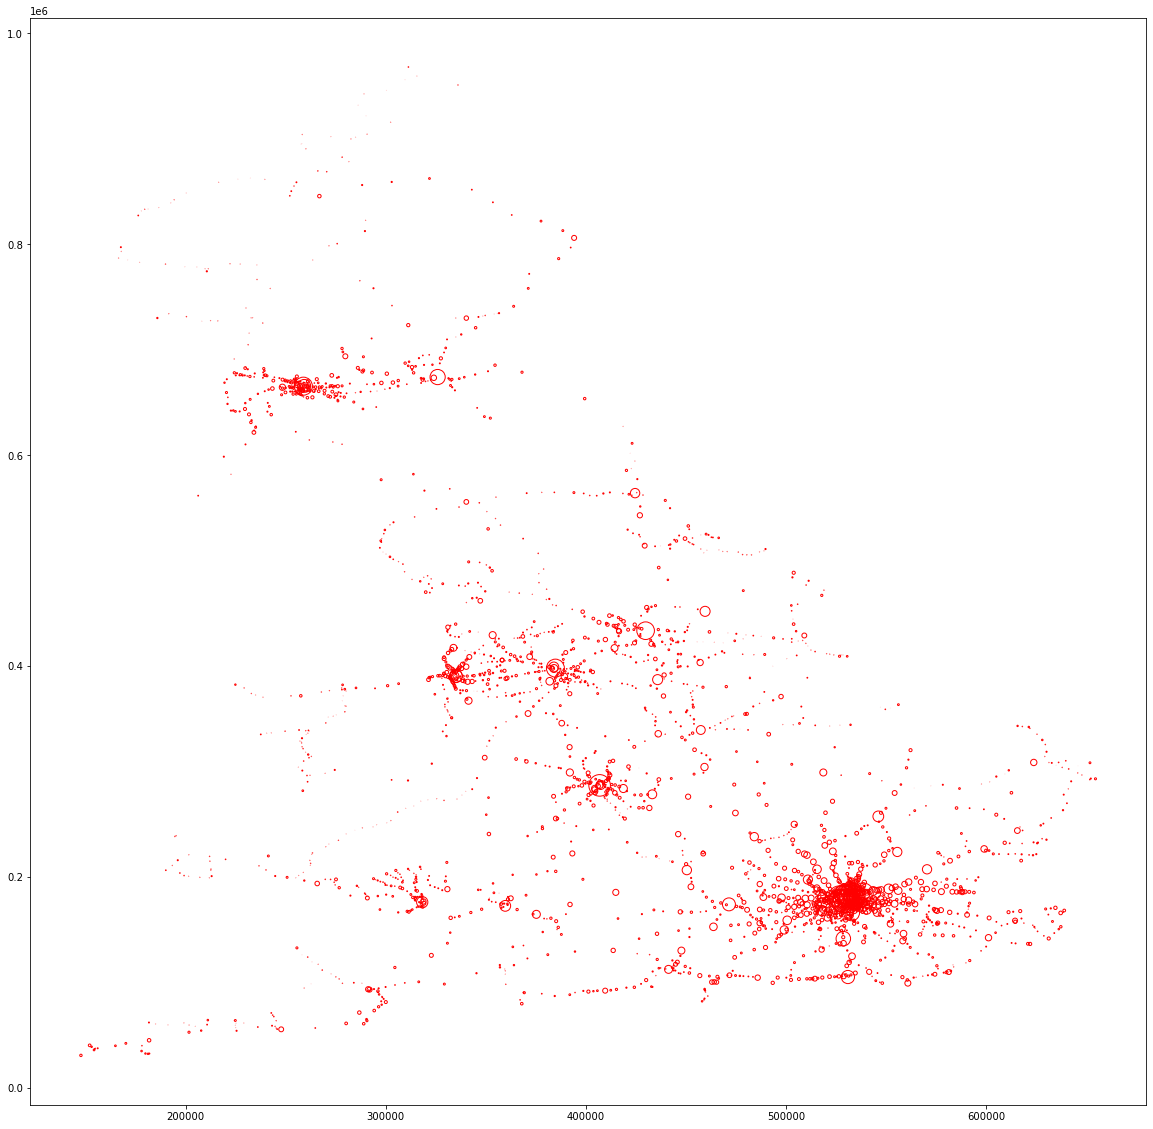

In [21]:
df_stations = pd.read_csv("Data/GB stations.csv")

df_stations["Eastings"], df_stations["Northings"] = convert_bng(df_stations.Longitude, df_stations.Latitude)

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(df_stations["Eastings"], df_stations["Northings"], s=df_stations["Entries and exits 2020"]/100000, c="None", edgecolors="Red")

In [22]:
df_stations

,Station,Postcode,Latitude,Longitude,TLC,NLC,Owner,Entries and exits 2020,Entries and exits 2019,Entries and exits 2018,...,Interchanges 2012,Interchanges 2011,Interchanges 2010,Interchanges 2009,Interchanges 2008,Interchanges 2007,Interchanges 2006,Interchanges 2005,Eastings,Northings
0,Abbey Wood,SE2 9RH,51.491061,0.121394,ABW,5131,TfL Rail,3825206,3769402.0,3124856.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,547372.077,179034.877
1,Aber,CF83 1AQ,51.574969,-3.229829,ABE,3813,TfW Rail,228480,245218.0,251108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,314870.703,186950.370
2,Abercynon,CF45 4SE,51.644712,-3.326989,ACY,3801,TfW Rail,282886,289008.0,298358.0,...,35304.0,33225.0,29324.0,28775.0,NaN,NaN,NaN,NaN,308278.856,194824.123
3,Aberdare,CF44 0PU,51.715062,-3.443084,ABA,3982,TfW Rail,504622,555780.0,571746.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300400.742,202800.151
4,Aberdeen,AB11 6LX,57.143706,-2.098685,ABD,8976,ScotRail,2497108,2616142.0,2948186.0,...,197046.0,148594.0,164299.0,162526.0,119259.0,230788.0,201417.0,187983.0,394127.437,805874.121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,Yoker,G81 1AD,55.892592,-4.386288,YOK,9990,ScotRail,175180,173104.0,164182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250869.036,669181.432
2565,York,YO24 1AB,53.957966,-1.093182,YRK,8263,London North Eastern Railway,10089306,9990538.0,9833864.0,...,1197458.0,730555.0,756667.0,797940.0,757246.0,917777.0,796643.0,807869.0,459600.596,451698.210
2566,Yorton,SY4 3EP,52.808960,-2.736462,YRT,1351,TfW Rail,7544,7088.0,7686.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350453.770,323742.809
2567,Ystrad Mynach,CF82 7BP,51.640938,-3.241296,YSM,4026,TfW Rail,327198,374484.0,376976.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,314200.651,194300.239


In [23]:
gdf = gpd.GeoDataFrame(df_stations, geometry=gpd.points_from_xy(df_stations.Longitude, df_stations.Latitude))

,Name,Area_Description,geometry
0,Bedfordshire,Ceremonial County,"MULTIPOLYGON (((527179.004 248224.996, 527162...."
1,Berkshire,Ceremonial County,"MULTIPOLYGON (((504919.202 178392.095, 504918...."
2,Buckinghamshire,Ceremonial County,"MULTIPOLYGON (((505704.800 185453.304, 505704...."
3,Cambridgeshire,Ceremonial County,"MULTIPOLYGON (((571833.397 261707.896, 571813...."
4,Cheshire,Ceremonial County,"MULTIPOLYGON (((401780.298 370227.103, 401778...."
...,...,...,...
86,Western Isles,Ceremonial County,"MULTIPOLYGON (((152467.798 935008.696, 152466...."
87,Orkney,Ceremonial County,"MULTIPOLYGON (((358840.094 1005993.747, 358836..."
88,Shetland,Ceremonial County,"MULTIPOLYGON (((452147.497 1206082.502, 452148..."
89,Cornwall,Ceremonial County,"MULTIPOLYGON (((234782.596 86837.002, 234797.0..."


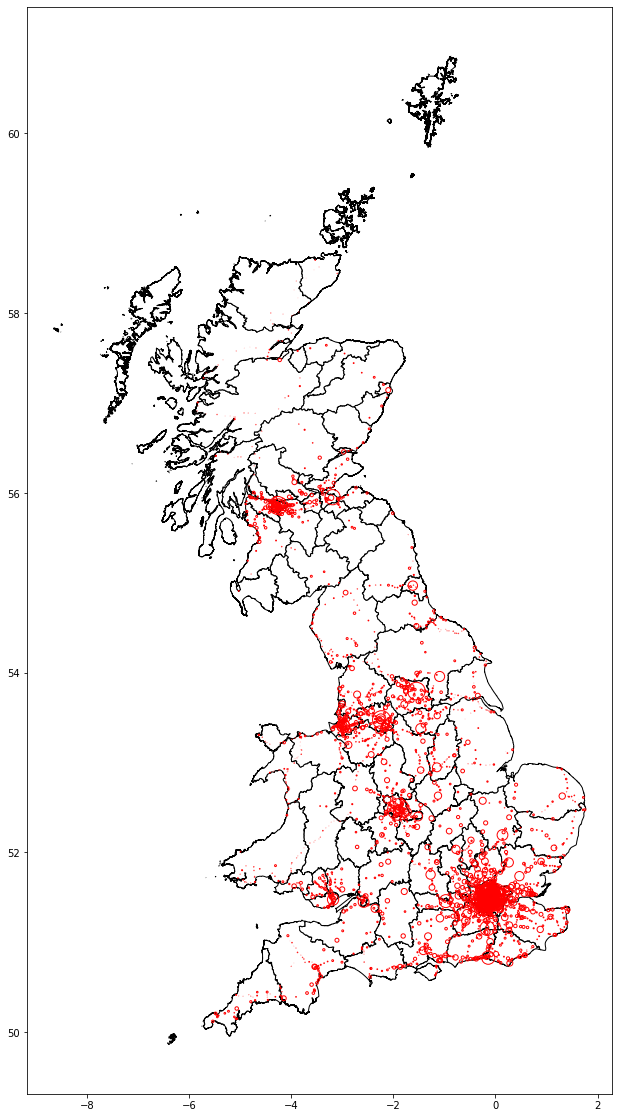

In [40]:
uk = gpd.read_file("Data/bdline_gpkg_gb/data/bdline_gb.gpkg", )
uk = uk.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(20,20))

ax = uk.plot(ax=ax, color='white', edgecolor='black')
#gdf.plot(ax=ax,legend=True, color="red", )

ax.scatter(df_stations["Longitude"], df_stations["Latitude"], s=df_stations["Entries and exits 2020"]/100000, c="None", edgecolors="Red")
